<a href="https://colab.research.google.com/github/franciellevargas/MFTCXplain/blob/main/Mikel_Kappa_fscore_jaccard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jaccard and F-SCORE

## Evaluation MFTC EMNLP Paper: section 3.2.3 Table 5

In [ ]:
def Jaccard_Similarity(doc1, doc2):
  try:
      doc1 = str(doc1).lower()
  except:
      doc1 = ""
  try:
      doc2 = str(doc2).lower()
  except:
      doc2 = ""

  if doc1 == 'nan' or doc2 == 'nan' or not doc1 or not doc2:
      return None
  words_doc1 = set(doc1.split())
  words_doc2 = set(doc2.split())

  if (not words_doc1) and not(words_doc2):
    return 1.0

  intersection = words_doc1.intersection(words_doc2)
  union = words_doc1.union(words_doc2)

  return float(len(intersection)) / len(union)

def f1_score(doc1, doc2):
  try:
      doc1 = str(doc1).lower()
  except:
      doc1 = ""
  try:
      doc2 = str(doc2).lower()
  except:
      doc2 = ""

  if doc1 == 'nan' or doc2 == 'nan' or not doc1 or not doc2:
      return None
  words_doc1 = set(doc1.split())
  words_doc2 = set(doc2.split())

  if (not words_doc1) and not(words_doc2):
    return 1.0

  intersection = words_doc1.intersection(words_doc2)
  precision = len(intersection)/len(words_doc1)
  recall = len(intersection)/len(words_doc2)

  if precision + recall == 0:
        return 0.0

  return 2 * (precision * recall) / (precision + recall)


In [ ]:
rational_set_1 = [col for col in explain.columns if col.startswith('rationales_1')]
rational_set_2 = [col for col in explain.columns if col.startswith('rationales_2')]
rational_set_3 = [col for col in explain.columns if col.startswith('rationales_3')]

explain['jaccard_rational_1'] = explain.apply(lambda row: Jaccard_Similarity(row[rational_set_1[0]], row[rational_set_1[1]]), axis =1,)
explain['jaccard_rational_2'] = explain.apply(lambda row: Jaccard_Similarity(row[rational_set_2[0]], row[rational_set_2[1]]), axis =1,)
explain['jaccard_rational_3'] = explain.apply(lambda row: Jaccard_Similarity(row[rational_set_3[0]], row[rational_set_3[1]]), axis =1,)


explain['fscore_rational_1'] = explain.apply(lambda row: f1_score(row[rational_set_1[0]], row[rational_set_1[1]]), axis =1,)
explain['fscore_rational_2'] = explain.apply(lambda row: f1_score(row[rational_set_2[0]], row[rational_set_2[1]]), axis =1,)
explain['fscore_rational_3'] = explain.apply(lambda row: f1_score(row[rational_set_3[0]], row[rational_set_3[1]]), axis =1,)

mean_jaccard_1 = explain['jaccard_rational_1'].mean()
mean_jaccard_2 = explain['jaccard_rational_2'].mean()
mean_jaccard_3 = explain['jaccard_rational_3'].mean()

mean_fscore_1 = explain['fscore_rational_1'].mean()
mean_fscore_2 = explain['fscore_rational_2'].mean()
mean_fscore_3 = explain['fscore_rational_3'].mean()

print(f' mean_jaccard_rational1: {mean_jaccard_1}\n mean_jaccard_rational2: {mean_jaccard_2}\n mean_jaccard_rational3: {mean_jaccard_3}')
print('\n')
print(f' f_score_rational1: {mean_fscore_1}\n f_score_rational2: {mean_fscore_2}\n f_score_rational3: {mean_fscore_3}')


 mean_jaccard_rational1: 0.5903327350249405
 mean_jaccard_rational2: 0.6321019448660415
 mean_jaccard_rational3: 0.5505710955710956


 f_score_rational1: 0.690476498883483
 f_score_rational2: 0.6998154811757193
 f_score_rational3: 0.6263287394866344


# Loading LLM Prompt outcomes

In [ ]:
# porto
import pandas as pd
import pandas as pd
from sklearn.metrics import f1_score


porto_gpt_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/new_gpt_porto_mftc_explain_cot.csv')
porto_gpt_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/new_gpt_porto_mftc_explain_zero.csv')
porto_gpt_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/new_gpt_porto_mftc_explain_4_shot_style_prompt.csv')
porto_llama_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/llama_porto_mftc_explain_cot.csv')
porto_llama_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/llama_porto_mftc_explain_zero.csv')
porto_llama_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/porto_gpt_llama_results/llama_porto_mftc_explain_4_shot_style_prompt.csv')

# italia
itali_gpt_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/gpt_itali_mftc_explain_cot.csv')
itali_gpt_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/gpt_itali_mftc_explain_zero.csv')
itali_gpt_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/gpt_itali_mftc_explain_4_shot_style_prompt.csv')
itali_llama_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/llama_itali_mftc_explain_cot.csv')
itali_llama_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/llama_itali_mftc_explain_zero.csv')
itali_llama_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/italia_gpt_llama_results/llama_itali_mftc_explain_4_shot_style_prompt.csv')

# persian
persian_gpt_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/gpt_persia_mftc_explain_cot.csv')
persian_gpt_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/gpt_persia_mftc_explain_zero.csv')
persian_gpt_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/gpt_persia_mftc_explain_4_shot_style_prompt.csv')
persian_llama_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/llama_persia_mftc_explain_4_shot_style_prompt.csv')
persian_llama_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/llama_persia_mftc_explain_cot.csv')
persian_llama_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/persia_gpt_llama_results/llama_persia_mftc_explain_zero.csv')

# engllish
english_gpt_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/gpt_mftc_explain_cot.csv')
english_gpt_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/gpt_mftc_explain_zero.csv')
english_gpt_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/gpt_mftc_explain_4_shot_style_prompt.csv')
english_llama_explain_4shot_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/llama_mftc_explain_4_shot_style_prompt.csv')
english_llama_explain_zero = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/llama_mftc_explain_zero.csv')
english_llama_explain_cot = pd.read_csv('.../MFTCXPLAIN_EMNLP_2025/english_gpt_llama_results/llama_mftc_explain_cot.csv')

Moral value transaltion by langauges:

##Italian:

itali_moral_values_translation = {

    "cura": "care",

    "danno": "harm",

    "equità": "fairness",

    "imbroglio": "cheating",

    "lealtà": "loyalty",

    "tradimento": "betrayal",

    "autorità": "authority",

    "sovversione": "subversion",

    "santità": "sanctity",

    "degradazione": "degradation"
}


##persian:

persi_moral_values_translation ={

    “مراقبت" : "care"

    "آسیب" : "harm"

    "انصاف" : "fairness"

    تقلب": cheating

    "وفاداری" : "loyalty"

    "خیانت" : betrayal

    "اقتدار" : "authority"

    "نافرمانی": subversion

    "پاکی" : "purity"

    "انحطاط" : degradation
}

##Portuguese:

moral_value_dict = {

    "cuidado": "care"
    "dano": "harm",
    "justiça": "fairness",
    "trapaça": "cheating",
    "lealdade": "loyalty",
    "traição": "betrayal",
    "autoridade": "authority",
    "subversão": "subversion",
    "santidade": "sanctity",
    "degradação": "degradation",
  }

# Code for calculating hate speech calssification and moral alignment - F-score only

## MFTC EMNLP Ppaper Table 7 - Partial


In [ ]:
def compute_custom_f1(df, case_name):
    # Replace 'none' with 'NM' in the predicted column
    df['moral_value'] = df['moral_value'].replace('None', 'NM')

    # Function to remove prefixes
    def remove_prefixes(text):
        if pd.isna(text):
            return ''
        prefixes = ["AN - ", "FN - ", "PN - ", "HN - ", "HP - ", "FP - ", "LP - ", "LN - ", "AP - ", "PP - "]
        for prefix in prefixes:
            if text.lower().startswith(prefix.lower()):
                return text[len(prefix):].strip()
        return text.strip()

    def replace_to_english(text):
        if pd.isna(text):
            return ''
        if not isinstance(text, str):
            return str(text)
        translation_dict_itali = {
            # Italian translations
            "cura": "care", "danno": "harm", "equità": "fairness", "imbroglio": "cheating",
            "lealtà": "loyalty", "tradimento": "betrayal", "autorità": "authority", #because it is written loyaty(no l) in the main dataset
            "sovversione": "subversion", "santità": "sanctity", "degradazione": "degradation"}

            # Persian translations
        translation_dict_persia = {"مراقبت": "care", "آسیب": "harm", "انصاف": "fairness", "تقلب": "cheating",
            "وفاداری": "loyalty", "خیانت": "betrayal", "اقتدار": "authority",
            "نافرمانی": "subversion", "پاکی": "purity", "انحطاط": "degradation"}

        text_lower = text.lower().strip()
        for italian, english in translation_dict_persia.items():
            if italian in text_lower:
                return english
        return text_lower
    # Normalize text
    for col in ['moral_value', 'mft_sentiment_first', 'mft_sentiment_second', 'mft_sentiment_third']:
        df[col] = df[col].str.lower().apply(remove_prefixes)
        df[col] = df[col].astype(str).str.replace('loyaty', 'loyalty', case=True) #the dataset has loyaty(no l)

    df['moral_value'] = df['moral_value'].astype(str).apply(replace_to_english)

    # Match predicted value against any of the reference labels
    def resolve_with_partial_match(row):
        pred = row['moral_value']
        refs = [row['mft_sentiment_first'], row['mft_sentiment_second'], row['mft_sentiment_third']]
        for ref in refs:
            if pred in ref or ref in pred:
                return ref
        return 'no_match'

    df['resolved_truth'] = df.apply(resolve_with_partial_match, axis=1)
    # Compute macro F1 score
    macro_f1_score = f1_score(df['resolved_truth'], df['moral_value'], average='macro')
    print(f"Macro F1 Score moral values caluclations with prefix removal and partial match logic for {case_name}: {macro_f1_score:.3f}\n")
    return macro_f1_score

In [ ]:
#example- English dataset
explain_cases = [('gpt_explain_cot',english_gpt_explain_cot),
                 ('gpt_explain_4shot_zero',english_gpt_explain_4shot_zero),
                 ('gpt_explain_zero',english_gpt_explain_zero),
                 ('llama_explain_cot',english_llama_explain_cot),
                 ('llama_explain_4shot_zero',english_llama_explain_4shot_zero),
                 ('llama_explain_zero',english_llama_explain_zero)]
output = {}
for (explain_name, explain_case) in explain_cases:
  f1_scores = compute_custom_f1(explain_case, explain_name)
  output[explain_name] = f1_scores
output

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for gpt_explain_cot: 0.202

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for gpt_explain_4shot_zero: 0.225

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for gpt_explain_zero: 0.254

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for llama_explain_cot: 0.322

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for llama_explain_4shot_zero: 0.301

(700, 15)
Macro F1 Score moral values caluclations with prefix removal and partial match logic for llama_explain_zero: 0.324



{'gpt_explain_cot': 0.20233118826828436,
 'gpt_explain_4shot_zero': 0.22511078304099696,
 'gpt_explain_zero': 0.25410186515833383,
 'llama_explain_cot': 0.3222874326693212,
 'llama_explain_4shot_zero': 0.30094955976395593,
 'llama_explain_zero': 0.3241732576562062}

# Code for MFTC EMNLP Ppaper: Appendix D.1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


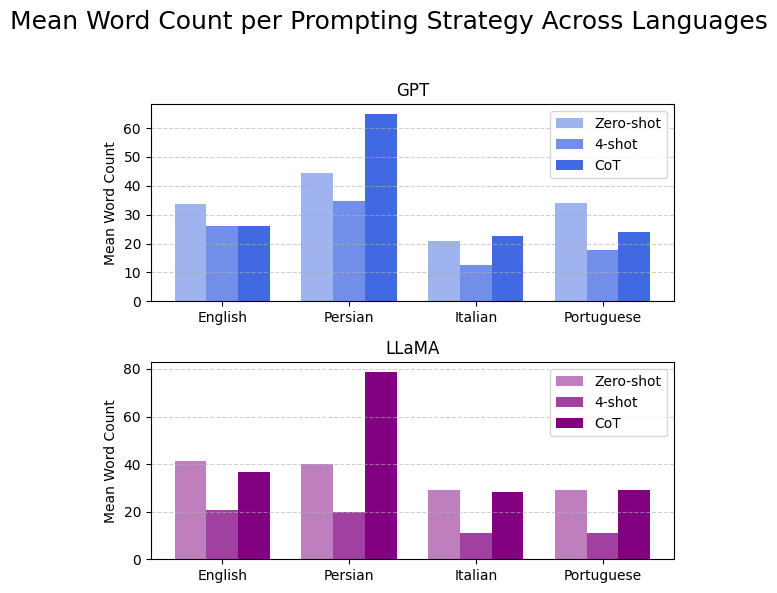

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
import nltk

# nltk.download('punkt_tab')
# import
from transformers import AutoTokenizer
persian_tokenizer = AutoTokenizer.from_pretrained("mshojaei77/PersianBPETokenizer")
farsi_tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased")


# Download necessary NLTK resources (run once)
nltk.download('punkt')

file_paths = {
    'English': {
        'GPT': {
            'Zero-shot': english_gpt_explain_zero,
            '4-shot': english_gpt_explain_4shot_zero,
            'CoT': english_gpt_explain_cot
        },
        'LLaMA': {
            'Zero-shot': english_llama_explain_zero,
            '4-shot': english_llama_explain_4shot_zero,
            'CoT': english_llama_explain_cot
        }
    },
    'Persian': {
        'GPT': {
            'Zero-shot': persian_gpt_explain_zero,
            '4-shot': persian_gpt_explain_4shot_zero,
            'CoT': persian_gpt_explain_cot
        },
        'LLaMA': {
            'Zero-shot': persian_llama_explain_zero,
            '4-shot': persian_llama_explain_4shot_zero,
            'CoT': persian_llama_explain_cot
        }
    },
    'Italian': {
        'GPT': {
            'Zero-shot': itali_gpt_explain_zero,
            '4-shot': itali_gpt_explain_4shot_zero,
            'CoT': itali_gpt_explain_cot
        },
        'LLaMA': {
            'Zero-shot': itali_llama_explain_zero,
            '4-shot': itali_llama_explain_4shot_zero,
            'CoT': itali_llama_explain_cot
        }
    },
    'Portuguese': {
        'GPT': {
            'Zero-shot': porto_gpt_explain_zero,
            '4-shot': porto_gpt_explain_4shot_zero,
            'CoT': porto_gpt_explain_cot
        },
        'LLaMA': {
            'Zero-shot': porto_llama_explain_zero,
            '4-shot': porto_llama_explain_4shot_zero,
            'CoT': porto_llama_explain_cot
        }
    }
}


def compute_mean_word_count(df, language):
    if df['explanation'].isna().all():
        return 0

    if language == 'Italian':
        # Italian-specific tokenization
        return df['explanation'].astype(str).apply(
            lambda x: len(nltk.word_tokenize(x, language='italian'))).mean()
    elif language == 'Portuguese':
        # Portuguese-specific tokenization
        return df['explanation'].astype(str).apply(
            lambda x: len(nltk.word_tokenize(x, language='portuguese'))).mean()

    elif language == 'Persian':
        return df['explanation'].astype(str).apply(
            lambda x: len(farsi_tokenizer.tokenize(x))).mean()

    else:  # English and fallback
        return df['explanation'].astype(str).apply(
            lambda x: len(nltk.word_tokenize(x))).mean()

# mean word count
# def compute_mean_word_count(df):
#     return df['explanation'].astype(str).apply(lambda x: len(x.split())).mean()


# Collect scores
def get_mean_scores(model_name):
    data = []
    for lang in languages:
        means = []
        for prompt in prompt_types:
            path = file_paths[lang][model_name][prompt] #language, gpt or llama, and, prompts types
            mean_wc = compute_mean_word_count(path, lang)
            means.append(mean_wc)
        data.append(means)
    return np.array(data)

# Get data for GPT and LLaMA

languages = ['English', 'Persian', 'Italian', 'Portuguese']
prompt_types = ['Zero-shot', '4-shot', 'CoT']
gpt_scores = get_mean_scores('GPT')
llama_scores = get_mean_scores('LLaMA')

# Plot
x = np.arange(len(languages))  # 4 groups
bar_width = 0.25

fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharey=False)
fig.suptitle('Mean Word Count per Prompting Strategy Across Languages', fontsize=18)

for ax, scores, model, color in zip(axes, [gpt_scores, llama_scores], ['GPT', 'LLaMA'], ['royalblue', 'purple']):
    for i, prompt in enumerate(prompt_types):
        ax.bar(x + i*bar_width, scores[:, i], width=bar_width, label=prompt, color=color, alpha=0.5 + i*0.25)

    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(languages)
    ax.set_title(model)
    ax.set_ylabel("Mean Word Count")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()